* Mauricio Hernández López
* Bárbara García Quiroga

# Introducción y descripción de los datos

Escrito por: Mauricio

La base de datos que hemos decidido utilizar para este proyecto es una recopilación de casos prospectos a ser diagnosticados como cáncer de mama en Wisconsin, E.U. La base de datos incluye varias columnas que describen ciertas características de los tumores encontrados en los pacientes que conforman la tabla. Eventualmente, existe una columna de diagnóstico, que indica si el tumor en cuestión es maligno o benigno, la cual podrá servir de referencia al momento de evaluar los clusters que se formen mediante los algoritmos que se aplicarán posteriormente en este análisis. Eventualmente, antes de poder realizar el proceso de clustering, deben explorarse y limpiarse los datos, además, también es una buena idea ejecutar algún proceso de selección de variables para determinar cuales son mas útiles. El objetivo general de este proyecto es utilizar algoritmos de aprendizaje no supervisado para poder identificar patrones en esta base de datos de importancia médica, y poder determinar si es posible utilizar alguna combinación específica de atributos que haga posible la identificación de tumores malignos en una persona. Debemos recordar que el proceso de clusterización NO significa clasificar, puesto que ya que estamos hablando de aprendizaje no supervisado, realmente "no sabemos" cuales son tumores malignos y tumores benignos.

# Limpieza de los datos

Implementado por: Mauricio

El proceso de limpieza de los datos era relativamente sencillo para esta base de datos, ya que estaba relativamente limpia y además era pequeña (solamente tenía 569 entradas). Como es costumbre, primero se imprimió el dataframe original para ver su estructura. Observamos que cuenta con 33 columnas, pero las variables solamente son 10. ¿Por qué? Si observamos cuidadosamente, son las mismas 10 variables pero representadas de distinta forma, unas con respecto a su media, otras con respecto a su error y otras con respecto a su desviación estándar. Por lo que es facil intuír que las variables son solamente: radio, textura, perímetro, area, suavidad, compactividad, concavidad, puntos de concavidad, simetría y dimensión del fractal. 

Lo primero que se hace, es eliminar las columnas que no necesitamos para nada, que serían las de identificador (id), la última columna que solamente tiene datos nulos, y finalmente la columna de diagnóstico, la cual nos dice si el tumor en cuestion era maligno o benigno. Esta última no será eliminada directamente, sino que preferimos guardarla en una variable y dejarla de lado por el momento. Una vez removidas las columnas innecesarias, se buscó por datos nulos en las columnas que restaron, aunque no se encontró ninguno. Como paso siguiente, se utilizó la función de pandas.describe() para poder darnos una idea de la estadística descriptiva de la base de datos, y como pudimos observar, tampoco encontramos outliers, si bien, hay medidas que están relativamente alejadas de su media, tampoco lo están en niveles extremos, por lo también hemos decidido conservarlas. 

El siguiente paso, fue utilizar la variable que guarda los diagnósticos para hacer una gráfica de barras simple para entender la proporción de los tumores. Encontramos que 63% son benignos y el 37% son malignos aproximadamente. Lo siguiente, fue tomar todos los datos y aplicarles la función de escalamiento que viene incluída en scikit-learn, ya que las mediciones fueron tomadas en distintas medidas, lo cual puede ser perjudicial para la formación de los clusters.

Despues finalmente tomamos la decisón de solamente tomar las variables que fueron tomadas en relación a la media, por lo que las guardamos en una variable y descartamos el resto del dataframe. Utilizamos la muy útil función de seaborn.pairplot para graficar todos los scatterplots de las variables entre sí, y poder ver como se relacionan unas con otras. Sin embargo, otra cosa más útil era repetir ese mismo procedimiento, pero clasificando los puntos de acuerdo con su diagnóstico, lo cual en teoría nos entrega los clusters "correctos", es decir, los verdaderos grupos que forma la base de datos con de acuerdo con la columna de resultados.

Una vez terminado esto, solamente fue necesario imprimir una matriz de correlación para las 10 variables que ibamos a tomar en cuenta y ya podíamos comenzar a utilizar nuestros modelos. Como vemos, las correlaciones entre nuestras variables predictoras son buenas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.cluster import AffinityPropagation


warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
diagnosis = df["diagnosis"]
df = df.drop(["id", "diagnosis", "Unnamed: 32"], axis = 1)
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Cantidad de Benignos	:	  357
Cantidad de Malignos	:	  212


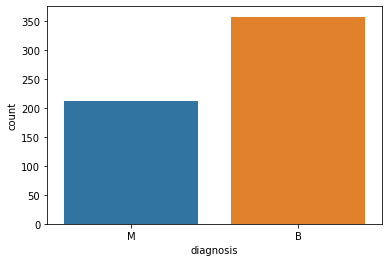

In [6]:
sns.countplot(diagnosis, label="Cantidad")    
B, M = diagnosis.value_counts()

print('Cantidad de Benignos\t:\t ',B)
print('Cantidad de Malignos\t:\t ',M)

In [7]:
from sklearn import preprocessing

columns = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
df_scaled = pd.DataFrame(preprocessing.scale(df))
df_scaled.columns = columns
df_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [8]:
df_columns = df_scaled.columns

columns_mean = df_columns[0:10]
features_mean = df_scaled[columns_mean]


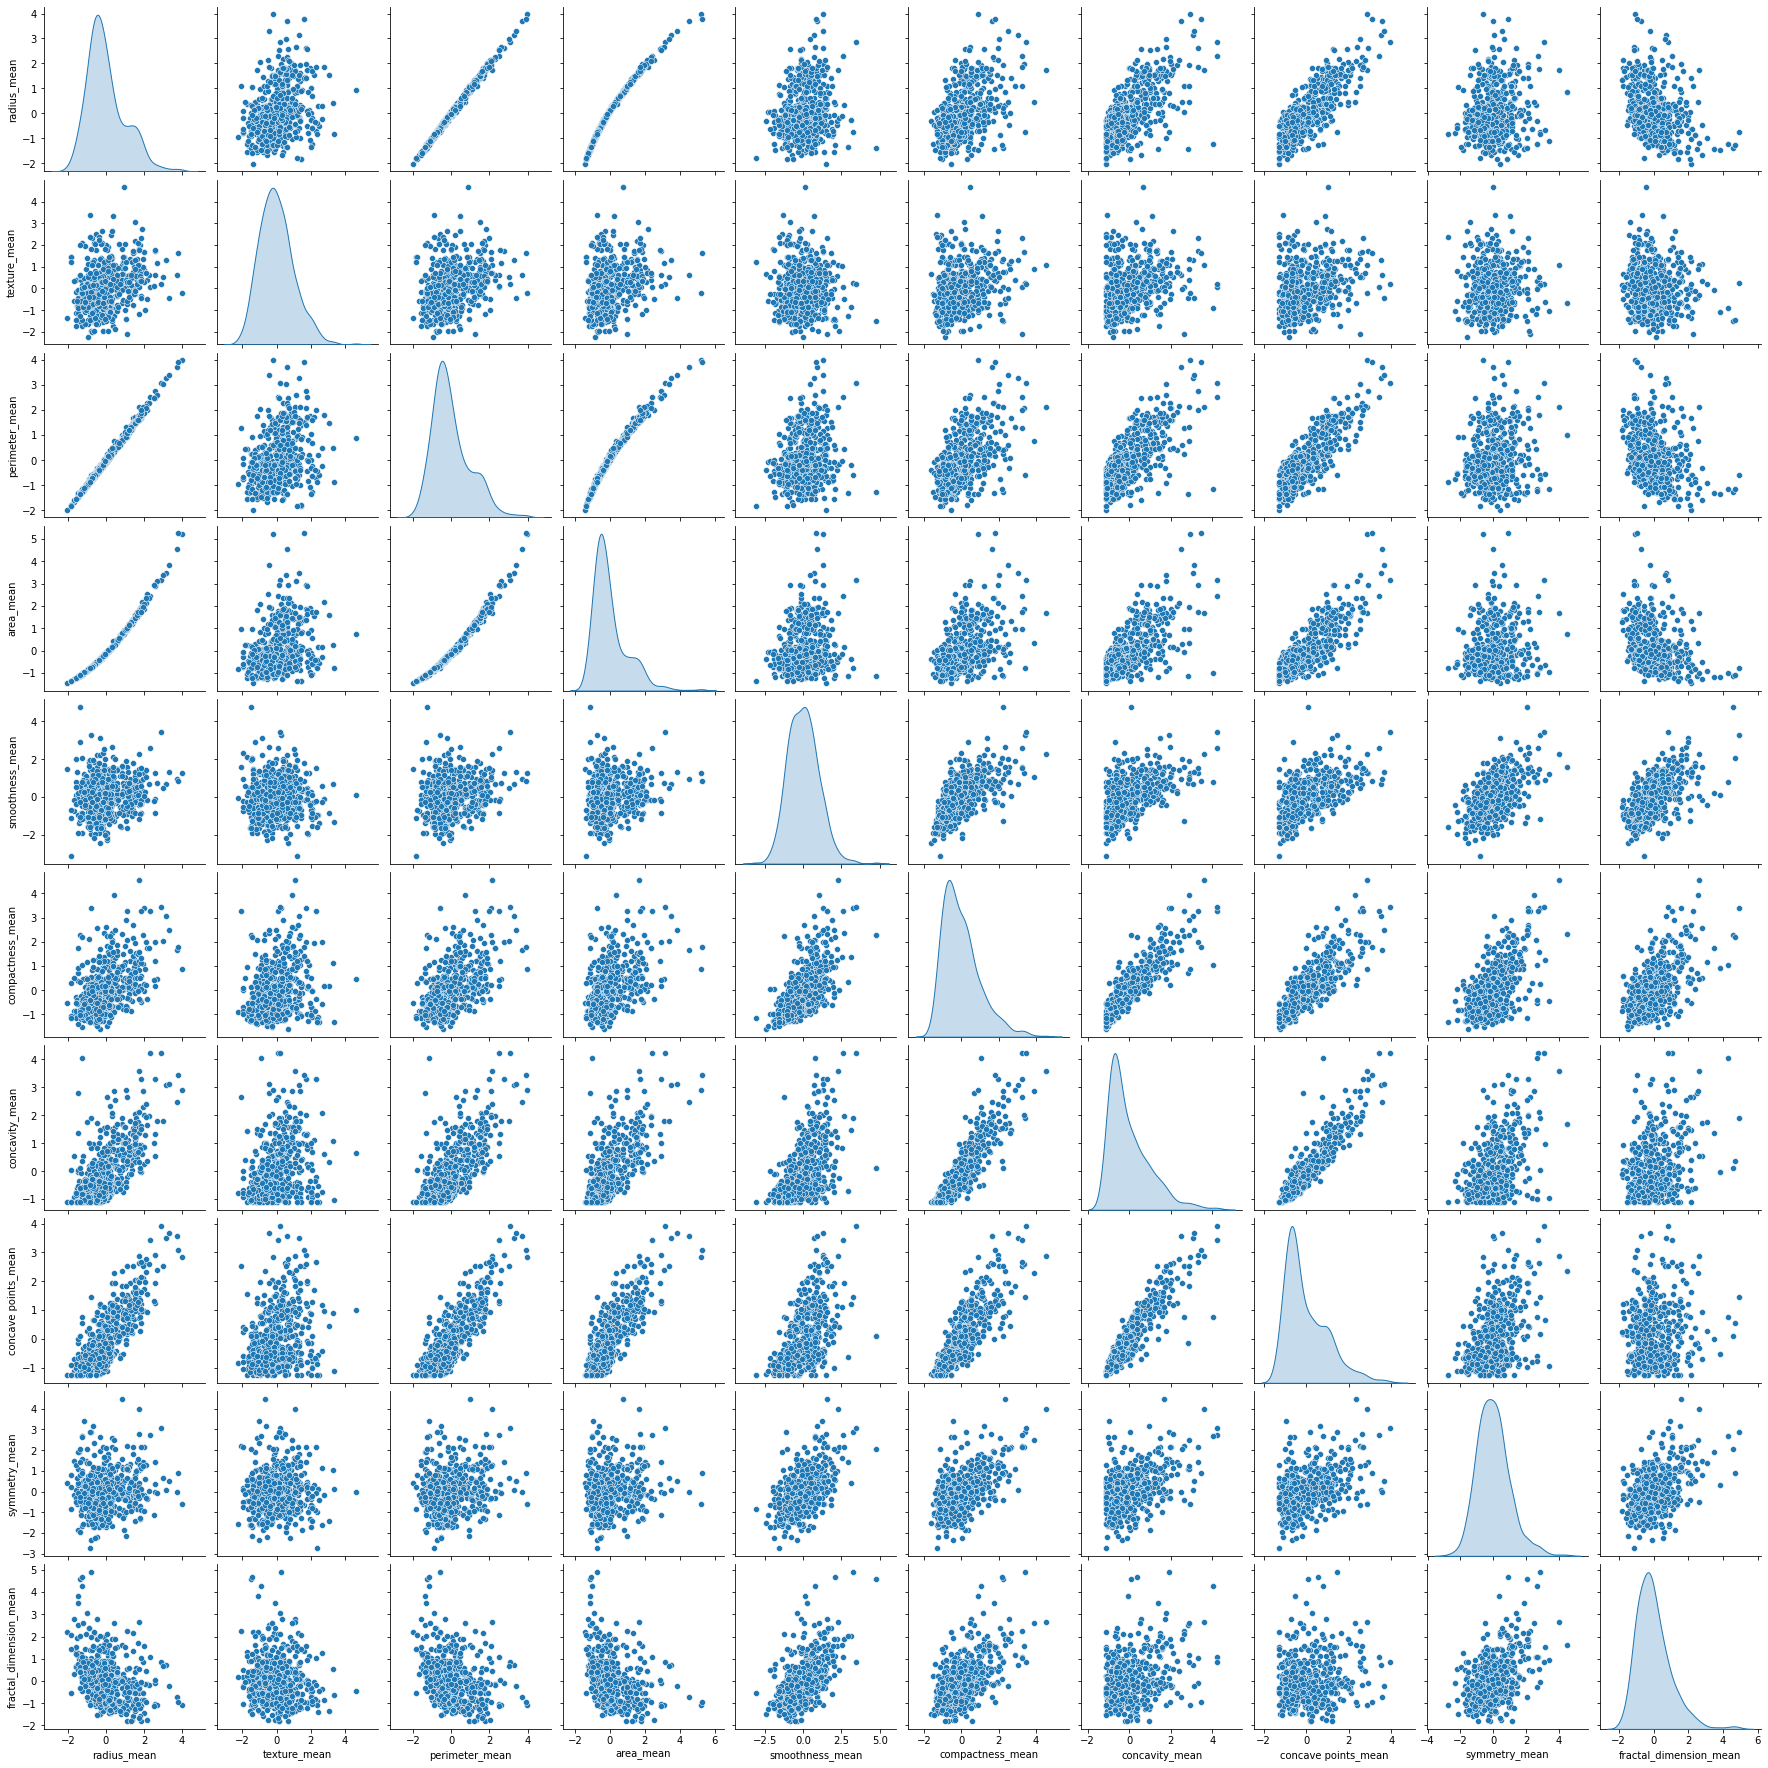

In [9]:
sns.pairplot(features_mean, diag_kind="kde",diag_kws=dict(shade=True))

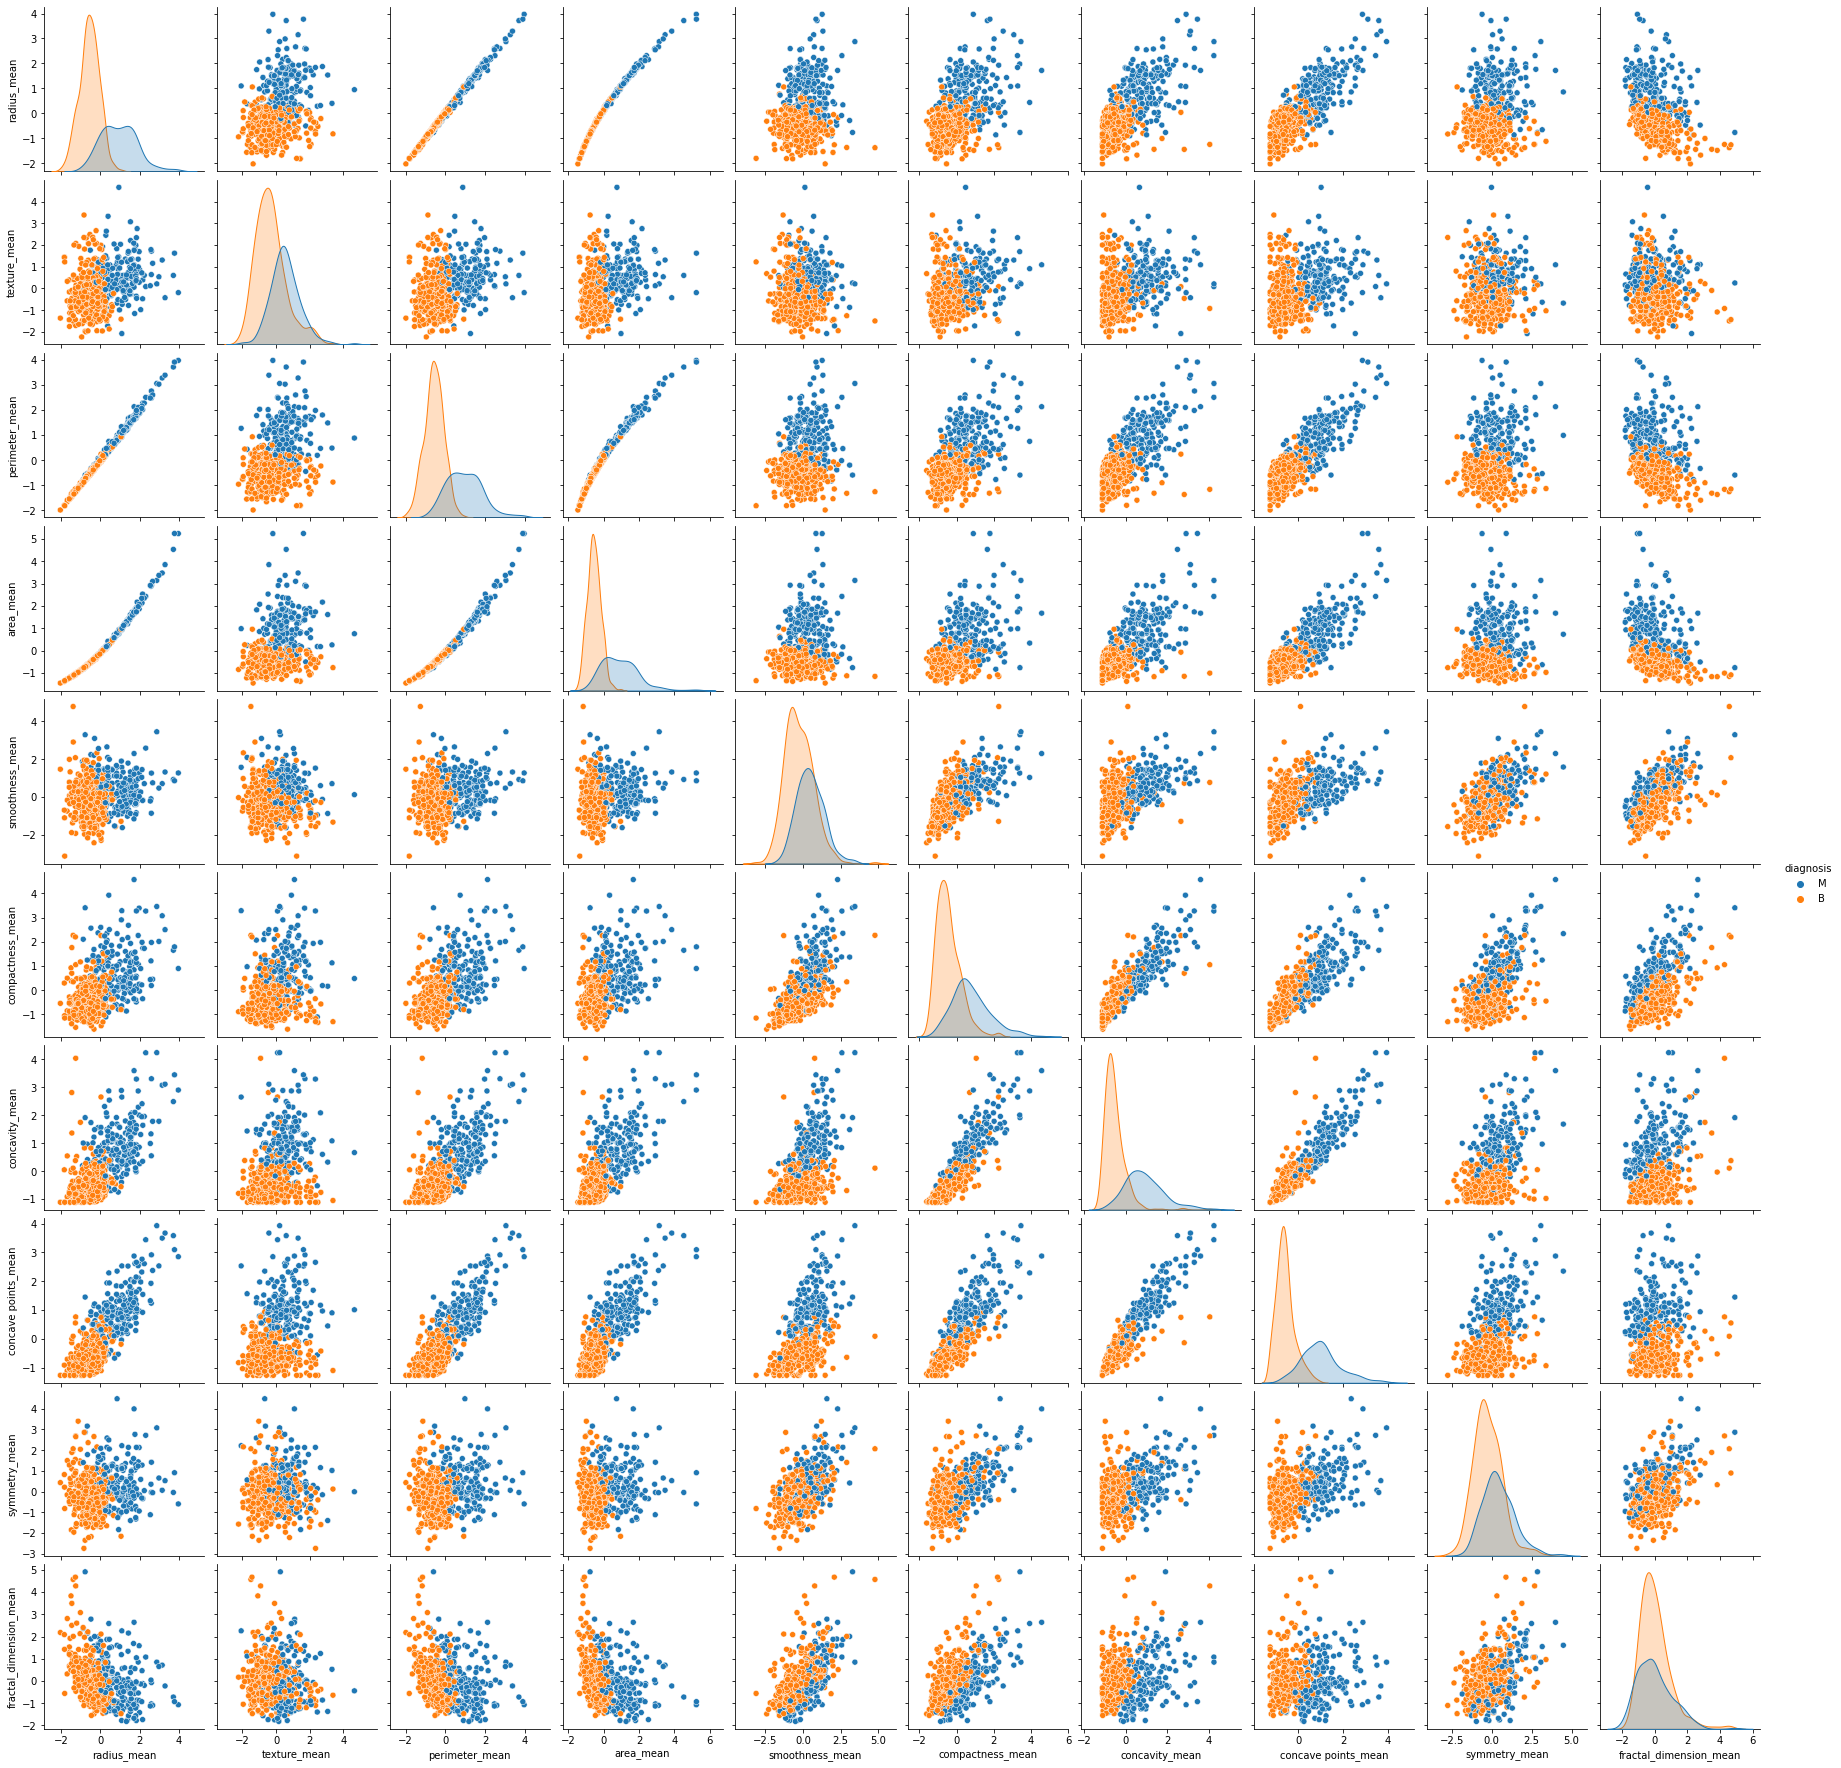

In [10]:
sns.pairplot(pd.concat([features_mean,diagnosis], axis=1),  hue='diagnosis', diag_kind="kde",diag_kws=dict(shade=True))

<AxesSubplot:title={'center':'Matriz de correlación de la media'}>

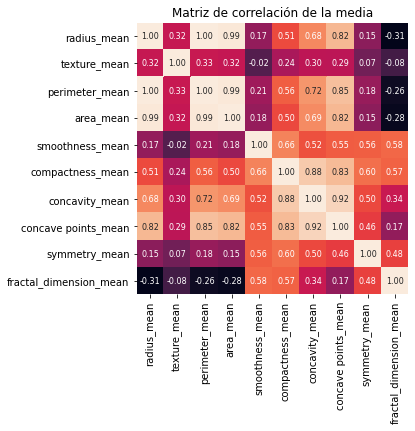

In [11]:
plt.figure(figsize=(22,5))
plt.title("Matriz de correlación de la media")
sns.heatmap(features_mean.corr(), cbar = False,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8})


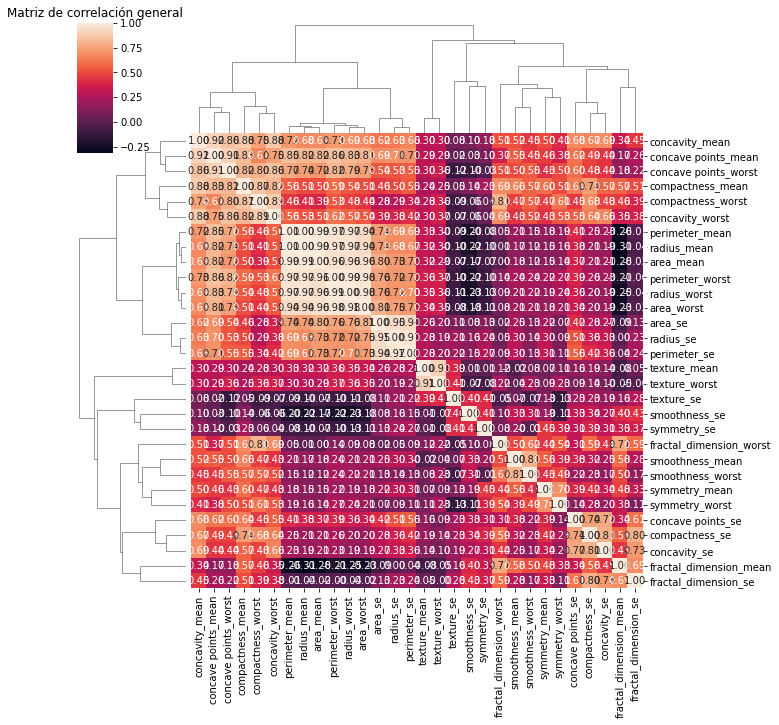

In [12]:
corr_matrix = df_scaled.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Matriz de correlación general")
plt.show()

# Clústering K-Means

Implementado por: Mauricio

El algoritmo de K-Means es relativamente intuitivo y fácil de comprender dado el conocimiento previo de algunos conceptos matemáticos.

En síntesis, K-Means forma grupos de datos de acuerdo con el nivel de "similitud" que hay entre ellos. Lo que quiere decir que entradas de datos "similares" estarán cerca unas de otras, y, por lo tanto, serán asignadas al mismo grupo, mientras que las entradas significativamente diferentes estarán más lejanas y no podrán ser asignadas al mismo grupo que el punto en cuestión.

La similitud en los datos se toma de acuerdo a la distancia que existe entre ellos, por lo que, eventualmente, una distancia menor, significará una similitud mayor. Esta distancia es tomada haciendo uso de expresiones ya conocidas, como la distancia euclidiana:

$D =\displaystyle\sqrt{\sum_{i=1}^{n}\left(y_{i}-x_{i}\right)^{2}}$

O la distancia Manhattan:

$D =\displaystyle\sum_{i=1}^{d}\left|a_{i}-b_{i}\right|$

Entonces, lo que el algoritmo trata de hacer a grandes rasgos es minimizar la distancia entre los puntos "vecinos" y maximizar la distancia entre los puntos "foráneos". Para hacer esto, sigue un proceso iterativo muy simple y elegante:

* Primero, el algoritmo selecciona un centroide para cada cluster al azar
* Luego, se calcula la distancia de todos los puntos hacia los centroides
* Se asignan los puntos a su cluster mas cercano
* Se calculan nuevos centroides para cada cluster calculando la media de todos los puntos dentro del cluster mismo
* Se repiten los pasos anteriores hasta que el vector de coordenadas del centroide converja en un punto específico, y, por lo tanto, deje de moverse con cada iteración

Entre sus ventajas está el hecho de que es un algoritmo simple y rápido de ejecutarse, aunque también es muy suceptible a outliers, ya que implica el cálculo de medias, entonces, si no se asegura que la base de datos está libre de entradas extremas, los clusters podrían desposicicionarse drásticamente.


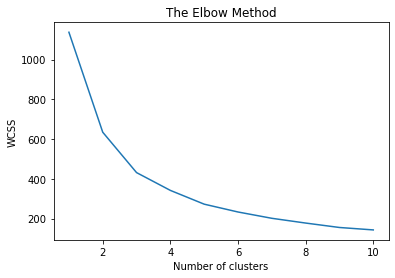

In [13]:
features_selected = df_scaled[["texture_mean", "concavity_mean"]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(features_selected)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(features_selected)
print(y_kmeans)

[0 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1
 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0
 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 1
 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 1 

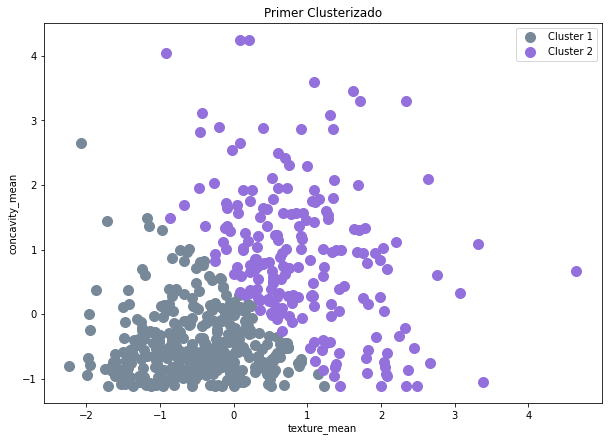

In [15]:
plt.figure(figsize=(10, 7))
plt.scatter(features_selected[y_kmeans == 0,0], features_selected[y_kmeans == 0, 1], s = 100, c = 'lightslategrey', label = 'Cluster 1')
plt.scatter(features_selected[y_kmeans == 1,0], features_selected[y_kmeans == 1, 1], s = 100, c = 'mediumpurple', label = 'Cluster 2')


plt.title('Primer Clusterizado')
plt.xlabel('texture_mean')
plt.ylabel('concavity_mean')
plt.legend()
plt.show()

<Figure size 720x720 with 0 Axes>

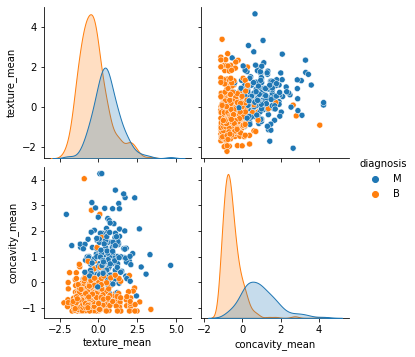

In [16]:
plt.figure(figsize=(10, 10))
sns.pairplot(pd.concat([features_mean[["texture_mean", "concavity_mean"]],diagnosis], axis=1),  hue='diagnosis', diag_kind="kde",diag_kws=dict(shade=True))
plt.show()

# Clustering Jerárquico (Dendogramas)

Implementado por: Bárbara

Los dendogramas funcionan por medio de agrupaciones jerarquicas, es decir, una familia o agrupacion que se va dividiendo entre cualidades diferentes. Por ejemplo, un dendograma podría iniciar con la agrupacion de animales y se va dividiendo por mamiferos replites etc posteriormente por tipo de animafleante o perros y finalmente por raza como poodle o pug. Esta jerarquia se representa por un arbol en donde la raiz es el grupo que reune todas las muestras y cteristicasw y las hojas son una sola muestra. Hay diferentes metodos de agrupacion como el agglomerative que se enfoca de abajo haa arriba y la ward que minimiza la suma de diferencias cuadradas haciendola similar al k-means.

Este metodo es muy popular puesto que:
* nos ayuda a comprender mejor los datos proporcionados
* se encuentra la union entre todos los datos
* no es necesario mencionar los clusters




Sin embargo:
* este metodo tambien resulta ser muy costoso computacionalmente
* puede llegar a terminar en una grafica inleible ya que, al no agregar restricciones, el modelo considera todas las posibles fusiones entre los datos.

El dendograma hace las uniones entre caracteristicas al calcular la distancia euclidiana, es decir, busca la distancia de los puntos y calcula las distancias, la que sea menor agrega un cluster, es decir, una linea que las une. 

Distancia euclidiana ecuacion utilizada para determinar la union de los datos
$D =\displaystyle\sqrt{\sum_{i=1}^{n}\left(y_{i}-x_{i}\right)^{2}}$

In [17]:
df2 = df.iloc[:, [2,7]].values
df2

array([[1.228e+02, 1.471e-01],
       [1.329e+02, 7.017e-02],
       [1.300e+02, 1.279e-01],
       ...,
       [1.083e+02, 5.302e-02],
       [1.401e+02, 1.520e-01],
       [4.792e+01, 0.000e+00]])

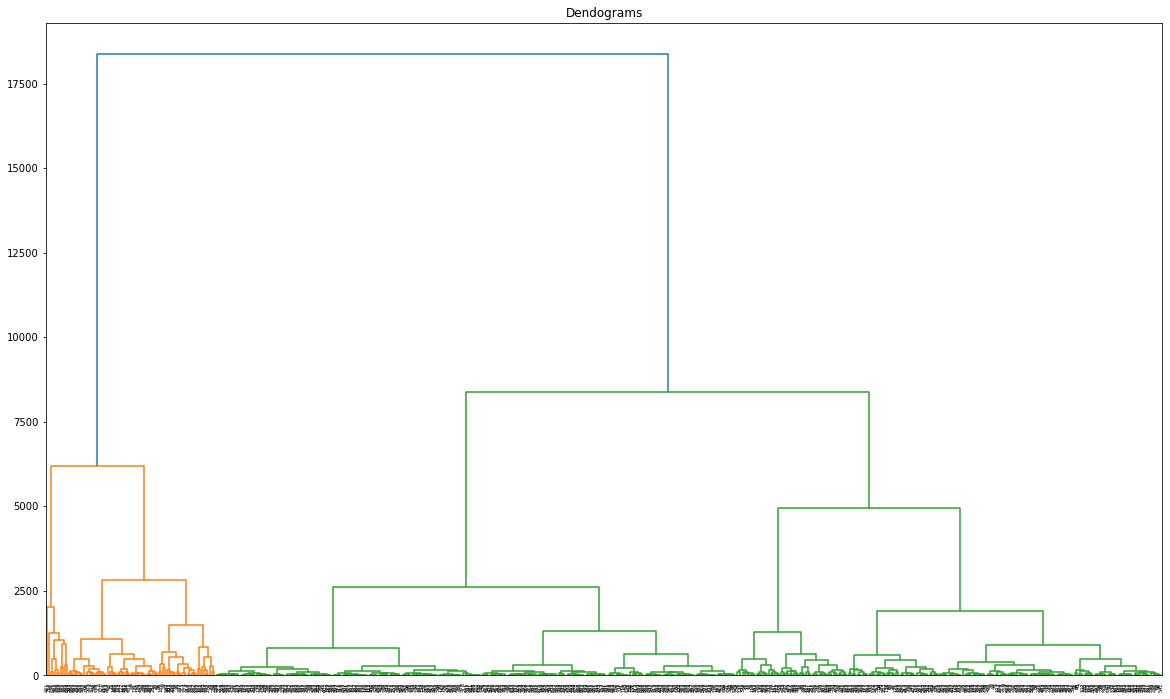

In [18]:

linked = linkage(df, 'ward')


plt.figure(figsize=(20, 12))
plt.title("Dendograms")

dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()



In [21]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

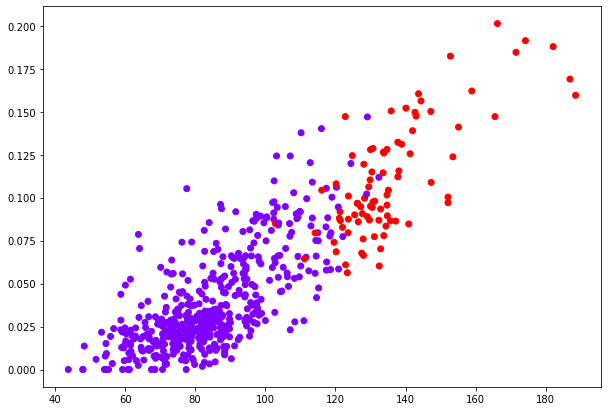

In [22]:
plt.figure(figsize=(10, 7))
plt.scatter(df2[:,0], df2[:,1], c=cluster.labels_, cmap='rainbow')

In [23]:
cluster.labels_

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [24]:
df['Predicted']=cluster.labels_.tolist()
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Predicted
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


In [25]:
df.groupby(['Predicted']).describe()

radius_mean                                                         \
                count       mean       std     min      25%     50%      75%   
Predicted                                                                      
0               483.0  13.003435  2.316259   6.981  11.4550  12.860  14.4900   
1                86.0  20.439186  2.253605  15.500  19.1825  20.145  21.0525   

                 texture_mean             ... symmetry_worst          \
             max        count       mean  ...            75%     max   
Predicted                                 ...                          
0          19.55        483.0  18.811925  ...        0.31295  0.6638   
1          28.11         86.0  21.972674  ...        0.35760  0.5558   

          fractal_dimension_worst                                         \
                            count      mean       std      min       25%   
Predicted                                                                  
0                           483.0  0.083457  0.018375  0.05504  0.070820   
1                            86.0  0.086693  0.016006  0.05525  0.076143   

                                       
                50%       75%     max  
Predicted                              
0          0.079000  0.091300  0.2075  
1          0.085765  0.095403  0.1339  

[2 rows x 240 columns]

# Spectral Clustering

Implementado por: Mauricio

El Spectral Clústering es un algoritmo inteligente que usualmente ha probado ser más eficiente que sus equivalentes más tradicionales. Se basa en considerar cada punto del plano como el nodo de un grafo, por lo que eventualmente transforma el problema de clusterizado en un problema de particionar un grafo, en el cual se intenta minimizar la distancia entre los nodos.

Para hacer esto, se recurre a un viejo conocido: el algoritmo de K-Nearest Neighbours, el cual se utiliza para definir lo que se denomina como una matriz de adyacencia. 

Después, se debe de proyectar el plano hacia un espacio dimensional menor, con el propósito de considerar la probabilidad de que algunos miembros del mismo cluster estén lejos entre sí en el espacio dimensional mayor (lo cual es una manera muy elegante de "blindar" al algoritmo de la posible existencia de outliers). Para reducir las dimensiones, se debe computar una matriz que se denomina como la Matriz Laplaciana de Grafos. Para ello, el grado de cada nodo se define mediante la siguiente expresión:

$d_{i}=\displaystyle\sum_{j=1 \mid(i, j) \epsilon E}^{n} w_{i j}$

Donde $\omega_ij$ es el arista entre los nodos representado en la matriz de adyacencia.

Entonces, la matriz de cada uno de los grados se forma por:

$D_{i j}=\displaystyle\left\{\begin{array}{c}d_{i}, i=j \\ 0, i \neq j\end{array}\right.$

Y la matriz laplaciana es implemente:

$L = D - A$

Finalmente, se utiliza un algoritmo de clusterizado estándar, como el K-Means para asignar los los puntos en el espacio dimensional menor. Primero, cada nodo es asignado a una fila de la matriz laplaciana, lo cual se clusteriza de forma tradicional. Para culminar, simplemente se deshace la transformación y los puntos se devuelven a su dimensión correcta.

In [26]:
from sklearn.cluster import SpectralClustering

spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
labels_rbf = spectral_model_rbf.fit_predict(features_selected)
print(labels_rbf)

[1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1
 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 

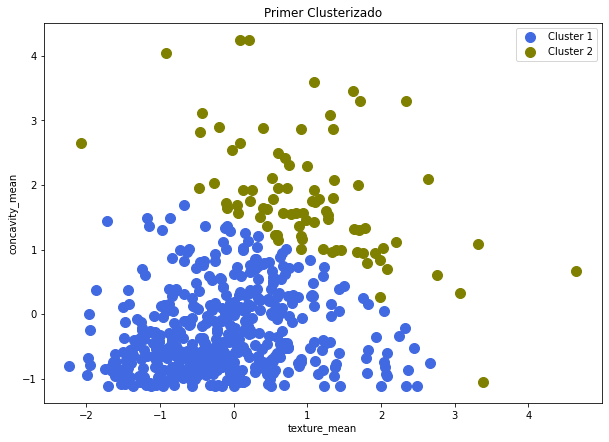

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(features_selected[labels_rbf == 0,0], features_selected[labels_rbf == 0, 1], s = 100, c = 'royalblue', label = 'Cluster 1')
plt.scatter(features_selected[labels_rbf == 1,0], features_selected[labels_rbf == 1, 1], s = 100, c = 'olive', label = 'Cluster 2')


plt.title('Primer Clusterizado')
plt.xlabel('texture_mean')
plt.ylabel('concavity_mean')
plt.legend()
plt.show()

<Figure size 720x720 with 0 Axes>

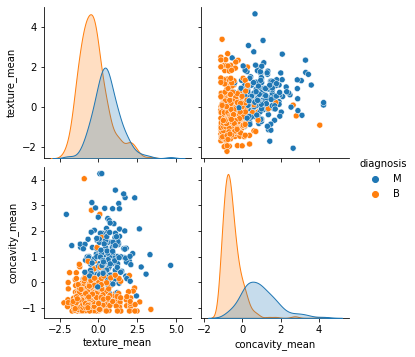

In [28]:
plt.figure(figsize=(10, 10))
sns.pairplot(pd.concat([features_mean[["texture_mean", "concavity_mean"]],diagnosis], axis=1),  hue='diagnosis', diag_kind="kde",diag_kws=dict(shade=True))
plt.show()

# Mean Shift

Implementado por: Bárbara

El mean shift es un modelo de analisis no parametrico que se basa en encontrar o localizar los maximos puntos de una funcion de densidad. Este metodo puede ser implementado para procesar datos e imagenes.

El desplazamiento medio es un modelo matematico que busca los modos de una funcion de densidad, osea los puntos maximos basado en una estimacion inicial. La ecuacion consiste en dividir la sumatoria dell kernel gaussiano entre un punto y su punto hermano.

Aunque este algoritmo se ha utilizado en muchas aplicaciones, es muy limitada en el mundo real. Sin embargo contiene las siguientes ventajas:

* herramienta independiente para el analisis de datos reales
* no asume forma predeterminada
* es capaz de manejar espacios arbitrarios
* el procedimiento solo contiene un parametro
* el tamaño de ventana tiene un significado fisico no como el kmeans

pero contiene las siguientes desventajas:
* la seleccion del tamaño de ventana no es trivial
* un tamaño inadecuado puede generar modos superficales
* requiere un tamaño adaptable



In [29]:
from sklearn.cluster import MeanShift, estimate_bandwidth

features_selected = df_scaled[["texture_mean", "concavity_mean"]].values


mean_shift = MeanShift(bandwidth=2).fit(features_selected)
labels_rbf = spectral_model_rbf.fit_predict(features_selected)
print(labels_rbf)

[0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 

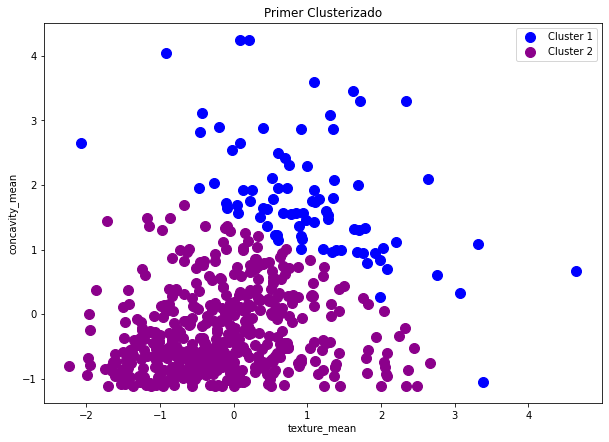

In [30]:
plt.figure(figsize=(10, 7))
plt.scatter(features_selected[labels_rbf == 0,0], features_selected[labels_rbf == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(features_selected[labels_rbf == 1,0], features_selected[labels_rbf == 1, 1], s = 100, c = 'darkmagenta', label = 'Cluster 2')


plt.title('Primer Clusterizado')
plt.xlabel('texture_mean')
plt.ylabel('concavity_mean')
plt.legend()
plt.show()

# Comparación

Como se puede visualizar en el pairplot que se implemento en dos modelos cuya grafica visualiza el resultado correcto de como se deben representar los datos, los resultados de los modelos representados son bastante acertados. Del modelo de K-means vemos que el primer cluster va desde la esquina inferior izquierda representada por -2 y termina justo antes de la mitad que la marca el 1 para despues entrar el segundo cluster que se dispersa mas entre los valores de 3 y 4. Este modelo da resultados incorrectos puesto que lo correcto sería el segundo cluster encima del primero y no en la diagonal. El metodo de los dendogramas se parecen a los resultados del primer modelo, sin embargo muestra los valores del segundo cluster mas separados desde el inicio y hay mucha saturazion en los primeros puntos. El metodo del spectral clustering representa el segundo cluster mas apegado a los resultados correctos, sin embargo, el primero cluster esta muy saturado y concentrado en la parte izquierda de la grafica, al contrario de la grafica correcta que se concentra mas en el centro. Por ultimo, el metodo de mean shift arrojo resultados muy parecidos al metodo de spectral clustering. Se puede concluir que el mejor modelo es el de Spectral por sus resultados mas acertados a los correctos

# Conclusiones individuales

## Mauricio

Como pudimos observar en los modelos, el aprendizaje no supervisado puede ser igual de preciso que su contraparte, puesto que dejamos toda la tarea de reconocimiento de patrones al algoritmo sin nosotros necesariamente tener que interferir modificando hiperparámetros u otras manejas de ajuste del modelo. En realidad, todos los modelos lo hicieron bastante bien, si comparamos el cluster "correcto" que se hizo en la parte de limpieza de los datos, con aquellos obtenidos en los modelos, vemos que realmente todos se acercan lo suficiente a la verdadera distribución de los diagnósticos. Es importante destacar que de alguna manera hicimos "trampa" puesto que ya teníamos la columna que indicaba el verdadero diagnóstico de los tumores, por lo que técnicamente ya sabíamos la forma que tenian que tomar los cúmulos de puntos. Además, escoger el número de clusters también fué trivial porque solo había dos grupos posibles: tumores benignos y tumores malignos.

Como sabemos, no todas las bases de datos son aptas para el aprendizaje no supervisado, por ejemplo, gracias a la columna de diagnósticos, hubiera sido mucho más sencillo solamente entrenar un algoritmo de clasificación como una SVM o un árbol de decisión, además, gracias a las grandes correlaciones entre la columna objetivo y las variables predictoras, habríamos podido obtener un alto índice de precisión con cualquiera de estos modelos.

Algunas posibles mejoras a los modelos que yo implementé habrían podido ser los procesos de selección de variables que hemos aprendido en otras clases. Había ciertos grupos de atributos que eran linealmente separables casi a la perfección, por lo que, de haberse usado los atributos correctos, los modelos podrían haber alcanzado un grado de precisión mayor.

## Bárbara

A diferencia de los modelos supervisados, los no supervisados descubren los resultados durante el proceso. Esto implica descubrir nuevos patrones o resultados que no se podian reconicer previamente. El nidelo debe aprender sin decirle que es lo que debe aprender. Aunque previamente conociamos los resultados correctos, los modelos pudieron aprender por su cuenta y descubrir el resultado lo que evidenta que los modelos no supervisados son igual de eficientes que los supervisados. 

Al momento de comparar los modelos descubrimos que los primeros dos modelos y los ultimos dos arrojaron resultados similares, sin embargo los mejores fueron el spectral y el mean por sus resultados tan acertados a los correctos.

Aunque los resultados fueron positivos, considero que los modelos pueden ser mejorados de varias maneras. Mencionando que se pudiera utilizar una base de datos que no descubriera los resultados para asi descubrir la respuesta utilizando simplemente el modelo implementado. Tambien se puede mejorar en conocer mejor los datos para poder elegir las columnas que queremos comparar. Considero que la secuencia en la que implementamos los modelos pudo haber sido diferente, por ejemplo primero el dendograma para conocer mas los valores como mencione.